# EDA - Dataset 1

**Objectives** 
 - make sure the dataset looks good before preprocessing
 - make informed decisions when it comes time to preprocessing

In [1]:
import sys
from pathlib import Path
import os

root = Path.cwd()
while root != root.parent and not (root / "pyproject.toml").exists():
    root = root.parent

sys.path.insert(0, str(root))
sys.path.insert(0, str(root / "src"))

os.chdir(root)

In [2]:
from __future__ import annotations
import numpy as np
import pandas as pd

# reusing the loader to access the data
from data_loader import load_dataset

# paths to dataset 1
TRAIN_X = "data/TrainData1.txt"
TRAIN_Y = "data/TrainLabel1.txt"
TEST_X = "data/TestData1.txt"

# the missing value given in the assignment
MISSING_VALUE = 1.0e99

## loading the data

In [3]:
x_train, y_train, x_test = load_dataset(TRAIN_X, TRAIN_Y, TEST_X)
x_train.shape, y_train.shape, x_test.shape

((150, 3312), (150,), (53, 3312))

### Checking Basic Information

Total Nans: 9,936
Top 10 features by most Nans:
 f280     12
f2628    10
f2135     9
f832      9
f465      9
f2403     9
f685      9
f154      9
f1672     9
f1988     8
dtype: int64
Top 10 rows with most missing values:
 58     85
51     85
89     83
109    82
140    81
47     80
73     79
133    79
117    78
71     78
dtype: int64

Label distribution:
 label
1    108
2     14
3     11
4     14
5      3
Name: count, dtype: int64


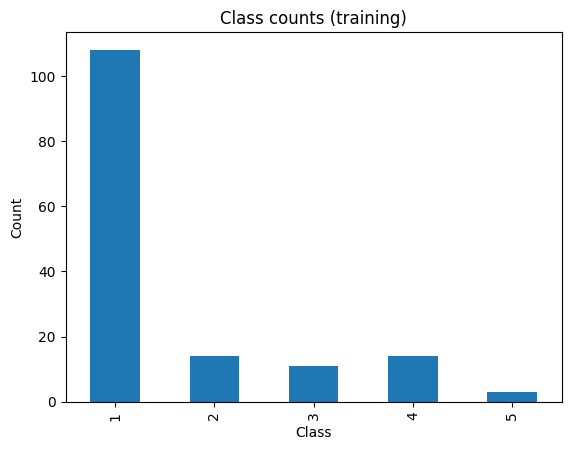

In [6]:
import matplotlib.pyplot as plt

# Wrapping the datasets in DataFrames for easy viewing
feat_names = [f"f{i+1}" for i in range(x_train.shape[1])]
dfx = pd.DataFrame(x_train, columns=feat_names)
dfy = pd.Series(y_train, name="label")

# looking at the amount of NaN found in the DataFrame
total_nas = dfx.isna().sum().sum()
nans_per_feat = dfx.isna().sum().sort_values(ascending=False)
nans_per_row = dfx.isna().sum(axis=1)

# printing out the nan information
print(f"Total Nans: {total_nas:,}")
print("Top 10 features by most Nans:\n", nans_per_feat.head(10))
print("Top 10 rows with most missing values:\n", nans_per_row.sort_values(ascending=False).head(10))

# Checking out the Label distribution
label_counts = dfy.value_counts().sort_index()
print("\nLabel distribution:\n", label_counts)
label_counts.plot(kind="bar")
plt.title("Class counts (training)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


### Checking Feature Variance

In [8]:
variances = dfx.var(axis=0)
zero_var_feats = (variances == 0).sum()

print("Number of zero-variance features:", zero_var_feats)
print("Lowest 10 variances:\n", variances.sort_values().head(10))

Number of zero-variance features: 0
Lowest 10 variances:
 f136     0.001559
f1       0.002294
f2602    0.002458
f2993    0.002560
f1883    0.002621
f20      0.003374
f109     0.003461
f230     0.003718
f263     0.003769
f10      0.003822
dtype: float64


### Checking Ranges to see if have different scale

In [10]:
feat_min = dfx.min()
feat_max = dfx.max()

print("Feature min range:", feat_min.min(), "to", feat_min.max())
print("Feature max range:", feat_max.min(), "to", feat_max.max())

# Show a small sample of ranges
feat_ranges = feat_max - feat_min
print("\nSmallest 10 ranges:\n", feat_ranges.sort_values().head(10))
print("\nLargest 10 ranges:\n", feat_ranges.sort_values(ascending=False).head(10))

Feature min range: 1.0 to 3.71907096381171
Feature max range: 1.67797175281074 to 3.97262396460195

Smallest 10 ranges:
 f136     0.200142
f2602    0.243063
f1883    0.245186
f1       0.253553
f109     0.257050
f2993    0.267948
f1634    0.312142
f263     0.314709
f215     0.337159
f285     0.361728
dtype: float64

Largest 10 ranges:
 f1464    2.934103
f1172    2.927571
f1515    2.898608
f804     2.894278
f486     2.884157
f805     2.866157
f83      2.847652
f1628    2.814811
f1516    2.811368
f502     2.773421
dtype: float64


### Doing a Quick Preview of PCA

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize before PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(dfx.fillna(dfx.mean()))

pca = PCA(n_components=20)  # just preview first 20 components
pca.fit(x_scaled)

explained_var = pca.explained_variance_ratio_
print("Explained variance (first 10 PCs):")
print(np.round(explained_var[:10], 4))
print("Cumulative variance (10 PCs):", np.round(explained_var[:10].sum(), 4))

Explained variance (first 10 PCs):
[0.1555 0.0853 0.0534 0.0425 0.0386 0.0272 0.025  0.022  0.0184 0.0178]
Cumulative variance (10 PCs): 0.4857


### Visual Representation

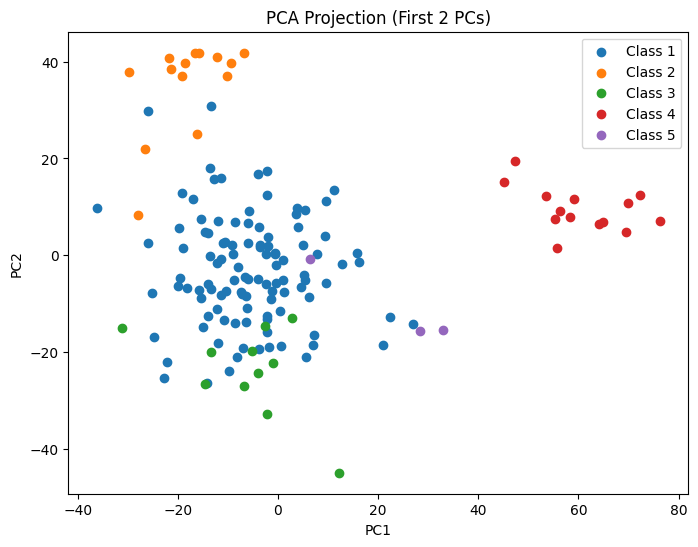

In [12]:
# Project first 2 PCs
X_pca2 = pca.transform(x_scaled)[:, :2]

plt.figure(figsize=(8,6))
for c in np.unique(y_train):
    mask = (y_train == c)
    plt.scatter(X_pca2[mask, 0], X_pca2[mask, 1], label=f"Class {c}")
plt.title("PCA Projection (First 2 PCs)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()